In [1]:
from graph_traffic.train_gnn import predict, train_with_args

import matplotlib.pyplot as plt
import matplotlib

C:\Users\Bened\PycharmProjects\madrid-traffic\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0. Define training parameters

In [2]:
args = dict(
    n_points=100,
    batch_size=64,
    diffsteps=2,
    decay_steps=2000,
    lr=0.01,
    minimum_lr=2e-6,
    epochs=50,
    max_grad_norm=5.0,
    num_workers=0,
    model="dcrnn",
    gpu=-1,
    num_heads=2, # relevant for model="gaan"
    out_feats=1*64,
    num_layers=2
)

data_dict = dict(
    ids_list=[1001, 1002, 1003, 1006],#, 3532, 3542, 3544, 3545, 3546, 3577, 3637, 3640, 3641, 4761, 4763],#[3954, 3973],#, 3976, 3977, 3978],

    seq_len=12,
    with_graph=True,
    from_date="2019-01-01",
    to_date="2021-12-31",
    dataset_name="small",
    target="vmed",  # 1
    interactions="drop"
)

meteo_dict = dict(
    rain="drop",  # 1
    wind="drop",
    temperature="drop",  # 0
    humidity="drop",  # 1
    pressure="drop",  # 0
    radiation="drop"  # 0
)

temporal_dict = dict(
    season="drop",
    month="drop",
    day_of_month="drop",
    hour="drop",
    bank_holiday="drop",
    working_day="drop",
    school_holiday="drop",
    state_of_alarm="drop",
    minute="drop",
    year="drop",
    weekday="drop"
)

# 1 Train model

Shape of train_x: (100, 12, 4, 3)
Shape of train_y: (100, 12, 4, 3)
Shape of test_x: (100, 12, 4, 3)
Shape of test_y: (100, 12, 4, 3)


C:\Users\Bened\PycharmProjects\madrid-traffic\env\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Epoch: 0 Train Loss: 32.394753748622726 Test Loss: 35.262936915971494
Epoch: 1 Train Loss: 24.381087063866936 Test Loss: 22.30388314028572
Epoch: 2 Train Loss: 4.88484150516754 Test Loss: 6.011505564413508
Epoch: 3 Train Loss: 34.80433503000259 Test Loss: 37.65056852406829
Epoch: 4 Train Loss: 29.173557033529555 Test Loss: 32.06737822334826
Epoch: 5 Train Loss: 7.259682639858855 Test Loss: 9.836891649457275
Epoch: 6 Train Loss: 20.581410149504258 Test Loss: 18.27345339620277
Epoch: 7 Train Loss: 18.738365288552174 Test Loss: 15.699879362918665
Epoch: 8 Train Loss: 5.771218025758387 Test Loss: 6.619684202574286
Epoch: 9 Train Loss: 15.77748000544424 Test Loss: 20.742570056607548
Epoch: 10 Train Loss: 15.442436156811542 Test Loss: 20.392768574583492
Epoch: 11 Train Loss: 5.073780701021489 Test Loss: 7.562766984552104
Epoch: 12 Train Loss: 13.067088918214456 Test Loss: 10.66609176568571
Epoch: 13 Train Loss: 13.140825541288894 Test Loss: 10.939974081415013
Epoch: 14 Train Loss: 5.14968890

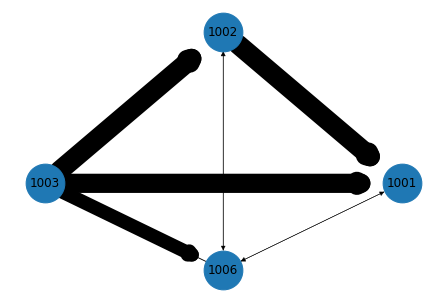

In [3]:
train_with_args(args, data_dict, meteo_dict, temporal_dict)

## 6. Try model

In [24]:
matplotlib.use("TkAgg")

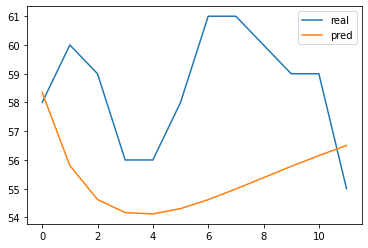

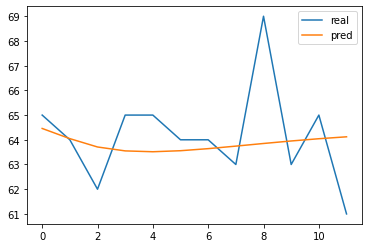

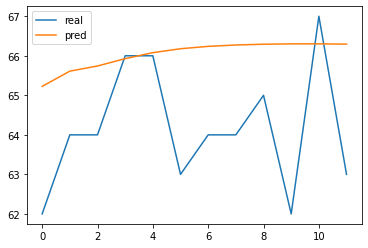

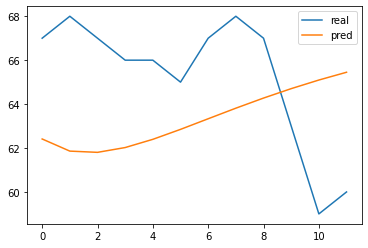

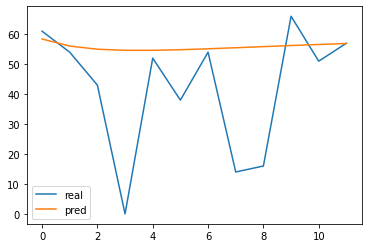

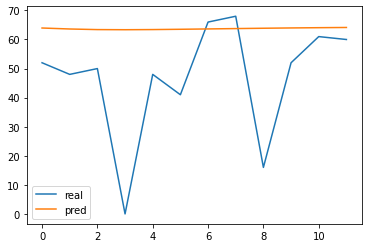

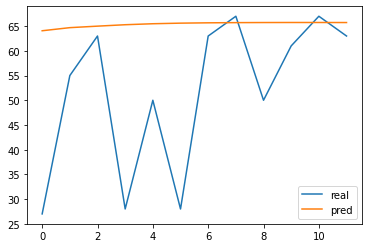

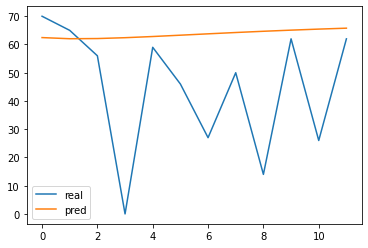

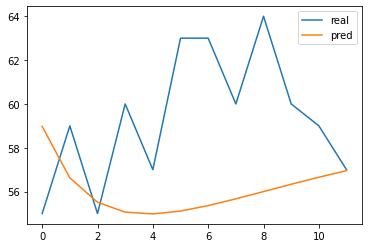

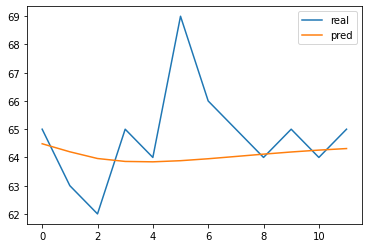

In [25]:
for i, (x, y) in enumerate(test_loader):
    #x, y, x_norm, y_norm, batch_graph = prepare_data(g.to(device), x, y, normalizer, args.batch_size, device)
    #y_pred = predict(dcrnn, batch_graph, x_norm, y_norm, normalizer, device, i)
    dcrnn.eval()
    y, y_pred = predict(x, y, batch_size, g.to(device), dcrnn, device, normalizer)
    break

for i in range(10):
    fig, ax = plt.subplots()
    #ax.set_title(f"de {(y[:, i, 1]*24).min().numpy()} a  {(y[:, i, 1]*24).max().numpy()}, sensor{i%5+1}")
    ax.plot(y[:, i, 0].detach().numpy(), label="real")
    ax.plot(y_pred[:, i, 0].detach().numpy(), label="pred")
    plt.legend()

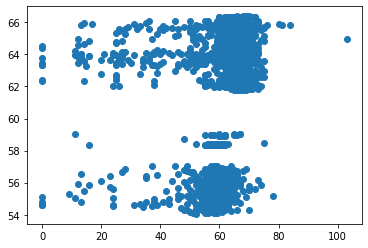

In [26]:
plt.scatter(y.detach().numpy().ravel(), y_pred.detach().numpy().ravel())
plt.show()

In [ ]:
plt.scatter(y.detach().numpy().ravel(), y_pred.detach().numpy().ravel())
plt.show()